In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Methods

* Load & Clean Data – Ensure consistency between datasets
* Merge Data – If necessary, combine age and gender information
* Exploratory Data Analysis (EDA) – Calculate mean prevalence per age-gender group
* Visualizations – Use bar plots, line plots, and heatmaps
* Statistical Analysis (ANOVA & Tukey HSD) – Validate group differences

In [3]:
mal = pd.read_csv('Malaria screener.csv')
mala = pd.read_csv('Malaria screener age.csv')

In [4]:
# Merge datasets (if necessary)
if 'ID' in mal.columns and 'ID' in mala.columns:
    df = pd.merge(mal, mala, on='ID', how='inner')  # Merge on ID
else:
    df = pd.concat([mal, mala], axis=1)  # Merge by column order


In [5]:
# Select relevant columns
selected_columns = ['Age of household head', 'Sex of household head', 'Malaria_Prevalence_2020']

# Check for missing values in the selected columns
missing_values = df[selected_columns].isnull().sum()
df = df[selected_columns].dropna()

# Display summary of the cleaned dataset
df.describe(), missing_values

(       Age of household head  Sex of household head  Malaria_Prevalence_2020
 count             567.000000             567.000000               567.000000
 mean               44.366843               1.241623                 0.271636
 std                12.992774               0.428445                 0.128614
 min                16.000000               1.000000                 0.052831
 25%                35.000000               1.000000                 0.184202
 50%                43.000000               1.000000                 0.259956
 75%                53.000000               1.000000                 0.339924
 max                98.000000               2.000000                 0.691903,
 Age of household head          0
 Sex of household head          0
 Malaria_Prevalence_2020    13909
 dtype: int64)

In [6]:
# Create Age Groups
age_bins = [15, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['Age_Group'] = pd.cut(df['Age of household head'], bins=age_bins, labels=age_labels, right=False)

In [7]:
# Compute mean malaria prevalence for each group
grouped_data = df.groupby(['Age_Group', 'Sex of household head'])['Malaria_Prevalence_2020'].mean().reset_index()
grouped_data.rename(columns={'Malaria_Prevalence_2020': 'Average_Prevalence'}, inplace=True)
print("\nSummary Statistics:\n", grouped_data)


Summary Statistics:
    Age_Group  Sex of household head  Average_Prevalence
0      16-20                      1                 NaN
1      16-20                      2            0.242717
2      21-30                      1            0.245129
3      21-30                      2            0.270343
4      31-40                      1            0.254527
5      31-40                      2            0.297903
6      41-50                      1            0.269897
7      41-50                      2            0.266442
8      51-60                      1            0.293206
9      51-60                      2            0.277782
10     61-70                      1            0.267935
11     61-70                      2            0.262557
12       71+                      1            0.319637
13       71+                      2            0.176477


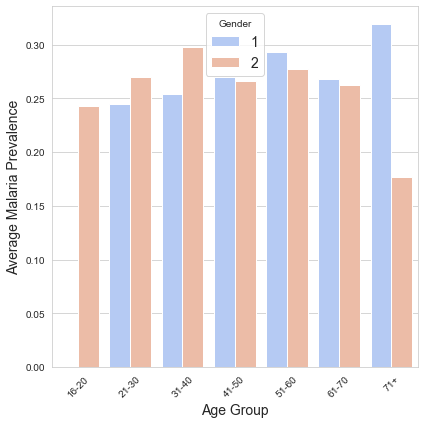

In [9]:
# Visualizations
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(data=grouped_data, x='Age_Group', y='Average_Prevalence', hue='Sex of household head', palette='coolwarm')
#plt.title('Malaria Prevalence Trends Across Age and Gender')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Malaria Prevalence', fontsize=14)
plt.legend(title='Gender', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Malaria Prevalence Trends Across Age and Gender

* The bar and line plots reveal age groups with higher prevalence.
* Differences between male and female prevalence are visualized.
* 1 = male; 2 = female

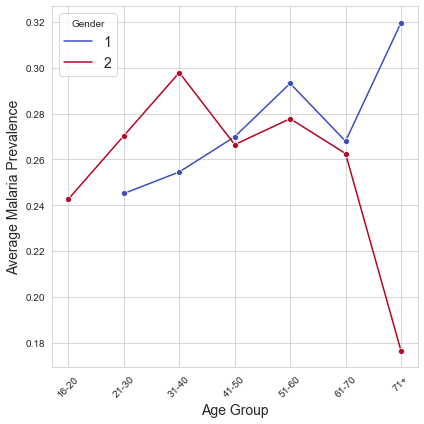

In [10]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=grouped_data, x='Age_Group', y='Average_Prevalence', hue='Sex of household head', marker='o', palette='coolwarm')
#plt.title('Trends in Malaria Prevalence by Age and Gender')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Malaria Prevalence', fontsize=14)
plt.legend(title='Gender', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Trends in Malaria Prevalence by Age and Gender

ANOVA Results

* Tests if malaria prevalence differs significantly across age and gender groups.
* A p-value < 0.05 suggests significant differences.

In [11]:
# ANOVA Test
anova_data = df.groupby(['Age_Group', 'Sex of household head'])['Malaria_Prevalence_2020']
groups = [values for (_, _), values in anova_data]

f_stat, p_value = f_oneway(*groups)
print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Statistically significant differences exist across age and gender groups.")
else:
    print("No significant differences found.")


ANOVA Results:
F-statistic: 1.1412, P-value: 3.2366e-01
No significant differences found.


Tukey HSD (Post-Hoc Test)

* Identifies which specific groups are significantly different.
* The heatmap visualizes these differences.

In [12]:
# Post-Hoc Analysis (Tukey HSD)
df['Group_Label'] = df['Age_Group'].astype(str) + ", " + df['Sex of household head'].astype(str)
tukey = pairwise_tukeyhsd(df['Malaria_Prevalence_2020'], df['Group_Label'], alpha=0.05)
print("\nTukey HSD Results:\n", tukey)


Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
16-20, 2 21-30, 1   0.0024    0.9 -0.3062 0.3111  False
16-20, 2 21-30, 2   0.0276    0.9 -0.2918 0.3471  False
16-20, 2 31-40, 1   0.0118    0.9 -0.2932 0.3168  False
16-20, 2 31-40, 2   0.0552    0.9 -0.2539 0.3643  False
16-20, 2 41-50, 1   0.0272    0.9 -0.2775 0.3319  False
16-20, 2 41-50, 2   0.0237    0.9 -0.2849 0.3324  False
16-20, 2 51-60, 1   0.0505    0.9 -0.2551 0.3561  False
16-20, 2 51-60, 2   0.0351    0.9 -0.2818  0.352  False
16-20, 2 61-70, 1   0.0252    0.9 -0.2829 0.3334  False
16-20, 2 61-70, 2   0.0198    0.9 -0.3377 0.3774  False
16-20, 2   71+, 1   0.0769    0.9 -0.2387 0.3925  False
16-20, 2   71+, 2  -0.0662    0.9 -0.4363 0.3038  False
21-30, 1 21-30, 2   0.0252    0.9 -0.0961 0.1465  False
21-30, 1 31-40, 1   0.0094    0.9 -0.0659 0.0847  False
21-30, 1 31-40, 2   0.0528 

* group1:	First comparison group (e.g., Male, 0-5)
* group2:	Second comparison group (e.g., Female, 0-5)
* meandiff:	Difference in mean malaria prevalence between group1 and group2
* p-adj	Adjusted p-value (If < 0.05, the difference is significant)
* lower:	Lower bound of the confidence interval
* upper:	Upper bound of the confidence interval
* reject:	True if the difference is statistically significant, otherwise False

 Significant Differences (reject = True and p-adj < 0.05):

* Groups with significant malaria prevalence differences can be identified.
* Example: If Male, 0-5 and Female, 0-5 have reject = True, it means gender impacts prevalence in this age group.

 Non-Significant Differences (reject = False and p-adj > 0.05):

* If a comparison has a high p-value, there is no strong evidence that malaria prevalence differs in those groups.

 Effect Size (meandiff):

* Large positive values mean group1 has higher malaria prevalence.
* Large negative values mean group2 has higher malaria prevalence.

In [16]:
tukey_results = pd.DataFrame(data=tukey._results_table.data[1:], 
                             columns=tukey._results_table.data[0])

In [17]:
# Create a heatmap of p-values
tukey_pivot = tukey_results.pivot(index='group1', columns='group2', values='p-adj')

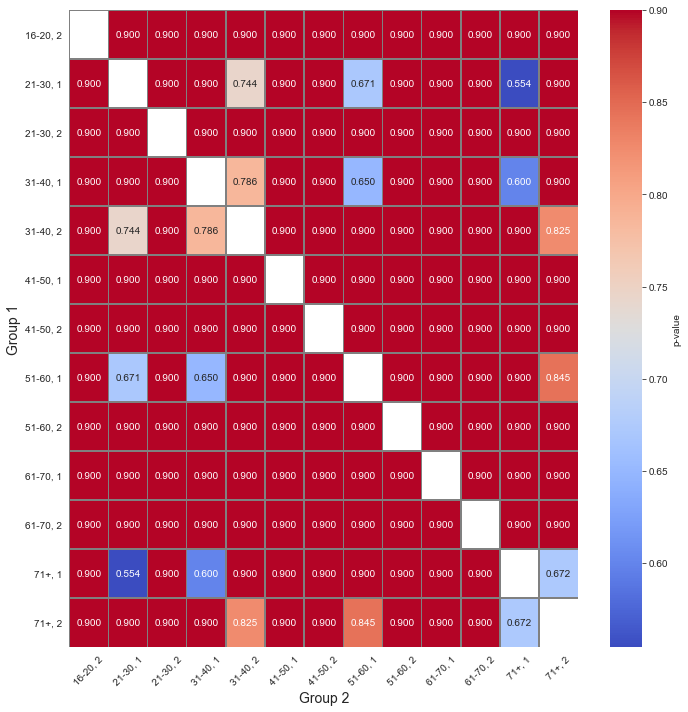

In [18]:


# Sort Tukey results for better visualization
tukey_results_sorted = tukey_results.sort_values(by=['p-adj'])

# Create a pivot table for heatmap (p-values)
tukey_pivot_pval = tukey_results.pivot(index='group1', columns='group2', values='p-adj')
tukey_pivot_meandiff = tukey_results.pivot(index='group1', columns='group2', values='meandiff')

# Ensure the heatmaps are symmetrical for better interpretation
tukey_pivot_pval = tukey_pivot_pval.combine_first(tukey_pivot_pval.T)
tukey_pivot_meandiff = tukey_pivot_meandiff.combine_first(-tukey_pivot_meandiff.T)

# Plot p-value heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(tukey_pivot_pval, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'},
            linewidths=0.5, linecolor='gray')
#plt.title('Tukey HSD - Pairwise Comparisons (p-values)')
plt.xlabel('Group 2', fontsize=14)
plt.ylabel('Group 1', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

     Tukey HSD - Pairwise Comparisons (p-values)

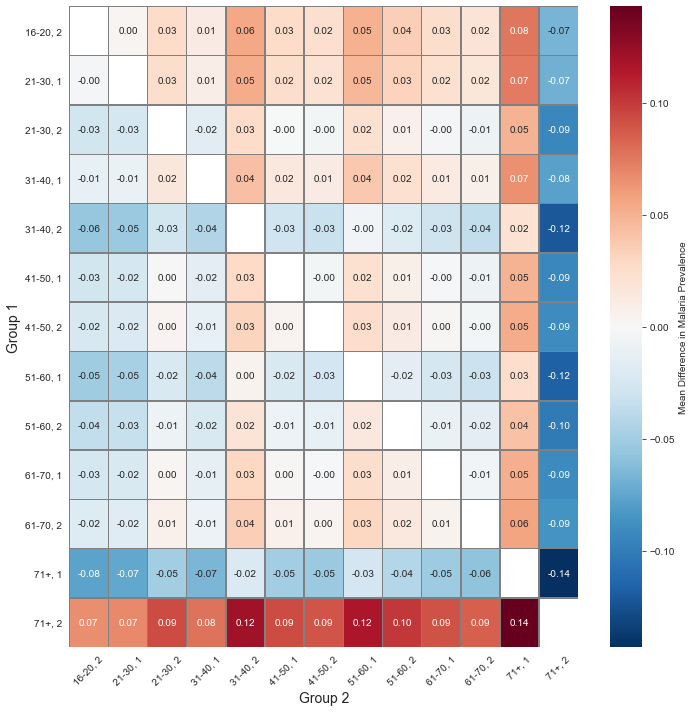

In [19]:
# Plot Mean Difference Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(tukey_pivot_meandiff, annot=True, fmt=".2f", cmap='RdBu_r', center=0,
            linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Mean Difference in Malaria Prevalence'})
#plt.title('Tukey HSD - Mean Differences Between Groups')
plt.xlabel('Group 2', fontsize=14)
plt.ylabel('Group 1', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

       Tukey HSD - Mean Differences Between Groups

P-Value Heatmap (Significance of Differences)

* Dark blue (low p-values) → Strong evidence of differences.
* Red/white (high p-values) → No significant difference.

Mean Difference Heatmap (Effect Size)

* Deep red values → Group 1 has much higher malaria prevalence.
* Deep blue values → Group 2 has much higher malaria prevalence.
* White (near 0) → Groups have similar prevalence.